In [2]:
! pip install ultralytics opencv-python-headless supervision wget matplotlib PyYAML tqdm
!wget https://github.com/imalikshake/DS_CV/releases/download/v1/trash_dataset.zip
!wget https://github.com/imalikshake/DS_CV/releases/download/v2/plant_disease_dataset.zip
!unzip trash_dataset.zip
!unzip plant_disease_dataset.zip

--2025-04-01 22:08:38--  https://github.com/imalikshake/DS_CV/releases/download/v1/trash_dataset.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-01 22:08:38 ERROR 404: Not Found.

--2025-04-01 22:08:38--  https://github.com/imalikshake/DS_CV/releases/download/v2/plant_disease_dataset.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-01 22:08:38 ERROR 404: Not Found.

unzip:  cannot find or open trash_dataset.zip, trash_dataset.zip.zip or trash_dataset.zip.ZIP.
unzip:  cannot find or open plant_disease_dataset.zip, plant_disease_dataset.zip.zip or plant_disease_dataset.zip.ZIP.


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path
import os
from ultralytics.data.utils import download
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

def train_yolo_model(dataset_path, epochs, train_name="experiment"):
    """
    Train YOLOv8 model on a dataset
    """
    model = YOLO("yolov8n.pt")

    # Train the model
    results = model.train(
        data=str(dataset_path / "data.yaml"),
        epochs=epochs,
        name=train_name,
        imgsz=640,
        batch=4
        #device=0
    )

    return model, results



In [ ]:
def evaluate_model(model, dataset_path):
    """
    Evaluate trained model on test-set
    """


    metrics = model.val(data=str(dataset_path / "data.yaml"))


    print("\nEvaluation Metrics:")
    print(f"mAP50: {metrics.box.map50:.4f}")
    print(f"mAP50-95: {metrics.box.map:.4f}")





In [ ]:
def visualize_predictions(model, dataset_path, num_images=2, conf_threshold=0.5):
    """
    Visualize predictions on n sample images
    """

    # TODO: Visualise bounding boxes and prediction on n images

    images_dir = dataset_path / "test" / "images"
    image_paths = list(images_dir.glob("*.jpg"))[:num_images]

    for image_path in image_paths:
        # Read image
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform inference
        results = model.predict(image, conf=conf_threshold)

        # Visualize results
        annotated_frame = results[0].plot()
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_frame)
        plt.axis("off")
        plt.title(f"Predictions for: {image_path.name}")
        plt.show()






In [ ]:


# Configuration
EPOCHS = 5

# Set-up dataset location
dataset_path = Path("./trash_dataset")



In [ ]:
# Verify dataset structure
print("\nDataset structure:")
print(f"Images directory: {dataset_path / 'valid' / 'images'}")
num_images = len(list((dataset_path / 'valid' / 'images').glob('*.jpg')))
print(f"Number of images: {num_images}")
if num_images == 0:
    raise RuntimeError("No images found in dataset")


print("\nDataset structure:")
print(f"Images directory: {dataset_path / 'train' / 'images'}")
num_images = len(list((dataset_path / 'train' / 'images').glob('*.jpg')))
print(f"Number of images: {num_images}")
if num_images == 0:
    raise RuntimeError("No images found in dataset")



print("\nDataset structure:")
print(f"Images directory: {dataset_path / 'test' / 'images'}")
num_images = len(list((dataset_path / 'test' / 'images').glob('*.jpg')))
print(f"Number of images: {num_images}")
if num_images == 0:
    raise RuntimeError("No images found in dataset")




Dataset structure:
Images directory: trash_dataset/valid/images
Number of images: 170

Dataset structure:
Images directory: trash_dataset/train/images
Number of images: 1783

Dataset structure:
Images directory: trash_dataset/test/images
Number of images: 83


In [ ]:

# Experiment name
train_name = "experiment"

In [ ]:
# Train model
print("\nStarting training process...")
model, results = train_yolo_model(dataset_path, epochs=EPOCHS, train_name=train_name)


Starting training process...


100%|██████████| 6.25M/6.25M [00:00<00:00, 119MB/s]


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=trash_dataset/data.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=experiment, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/trash_dataset/train/labels... 1783 images, 9 backgrounds, 0 corrupt: 100%|██████████| 1783/1783 [00:04<00:00, 385.76it/s]

train: New cache created: /content/trash_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/trash_dataset/valid/labels... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<00:00, 387.15it/s]

val: New cache created: /content/trash_dataset/valid/labels.cache


Plotting labels to runs/detect/experiment/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/experiment
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.87G      1.084      2.256      1.355         26        640: 100%|██████████| 446/446 [01:01<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 11.56it/s]


                   all        170        842      0.541      0.379      0.433      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.5G      1.107      1.866      1.377          9        640: 100%|██████████| 446/446 [00:59<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 13.20it/s]

                   all        170        842      0.622      0.557      0.608      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.48G      1.102      1.749      1.357         24        640: 100%|██████████| 446/446 [00:59<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 13.59it/s]

                   all        170        842      0.615      0.571      0.613      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.51G      1.064      1.566       1.34         10        640: 100%|██████████| 446/446 [00:58<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.71it/s]


                   all        170        842      0.705      0.572      0.638      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.51G      0.992      1.398      1.285         33        640: 100%|██████████| 446/446 [00:55<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  8.41it/s]


                   all        170        842      0.656      0.602      0.641      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.5G     0.9414      1.281      1.243         15        640: 100%|██████████| 446/446 [00:56<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 13.81it/s]

                   all        170        842      0.679      0.652      0.696      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.5G     0.8972      1.161      1.204         11        640: 100%|██████████| 446/446 [00:59<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 13.57it/s]

                   all        170        842      0.768      0.692      0.747      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.5G     0.8514      1.039      1.175          7        640: 100%|██████████| 446/446 [00:58<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.53it/s]

                   all        170        842      0.772      0.674      0.757      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.5G     0.8021     0.9557      1.144         25        640: 100%|██████████| 446/446 [00:55<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 13.54it/s]

                   all        170        842      0.788      0.736      0.794      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.5G     0.7737     0.8866      1.118         14        640: 100%|██████████| 446/446 [00:59<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:01<00:00, 14.17it/s]

                   all        170        842      0.808      0.745      0.822      0.598



10 epochs completed in 0.171 hours.
Optimizer stripped from runs/detect/experiment/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/experiment/weights/best.pt, 6.2MB

Validating runs/detect/experiment/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:02<00:00,  7.56it/s]


                   all        170        842      0.807      0.745      0.822      0.598
                 Metal         58        338        0.8      0.791       0.83        0.6
                 paper         61        181      0.764      0.735       0.81      0.612
               plastic         68        323      0.859      0.709      0.827      0.581
Speed: 0.8ms preprocess, 4.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/experiment


In [ ]:

# Evaluate model
evaluate_model(model, dataset_path)

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/trash_dataset/valid/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:03<00:00, 12.44it/s]


                   all        170        842      0.808      0.745      0.822      0.598
                 Metal         58        338        0.8      0.791       0.83      0.599
                 paper         61        181      0.766      0.735       0.81      0.612
               plastic         68        323      0.858      0.709      0.827      0.584
Speed: 0.5ms preprocess, 7.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/experiment2

Evaluation Metrics:
mAP50: 0.8222
mAP50-95: 0.5984



Visualizing predictions on sample images...

0: 640x640 10 plastics, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


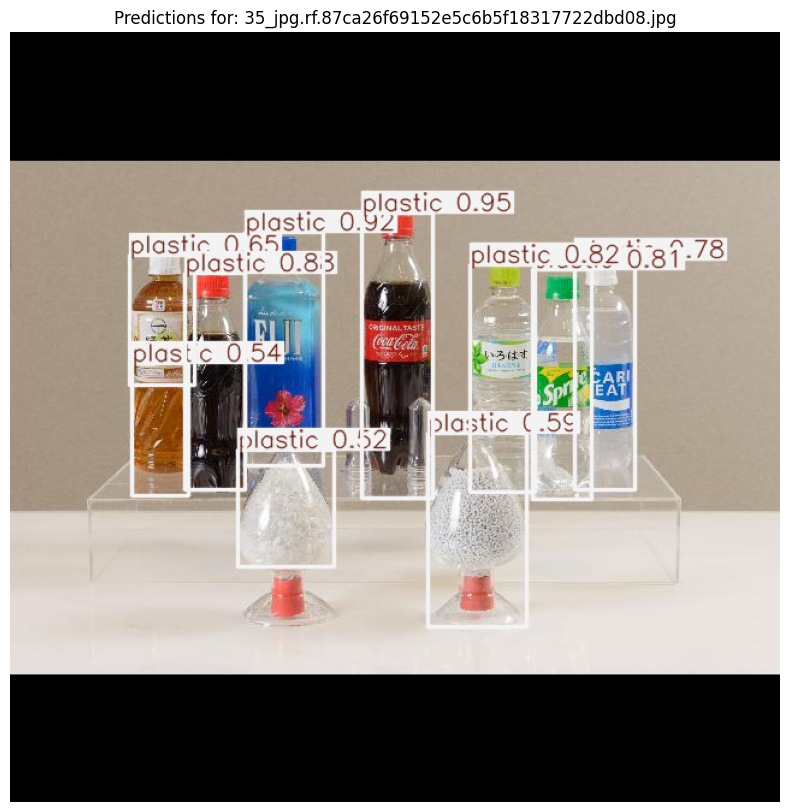


0: 640x640 1 plastic, 26.4ms
Speed: 2.9ms preprocess, 26.4ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)


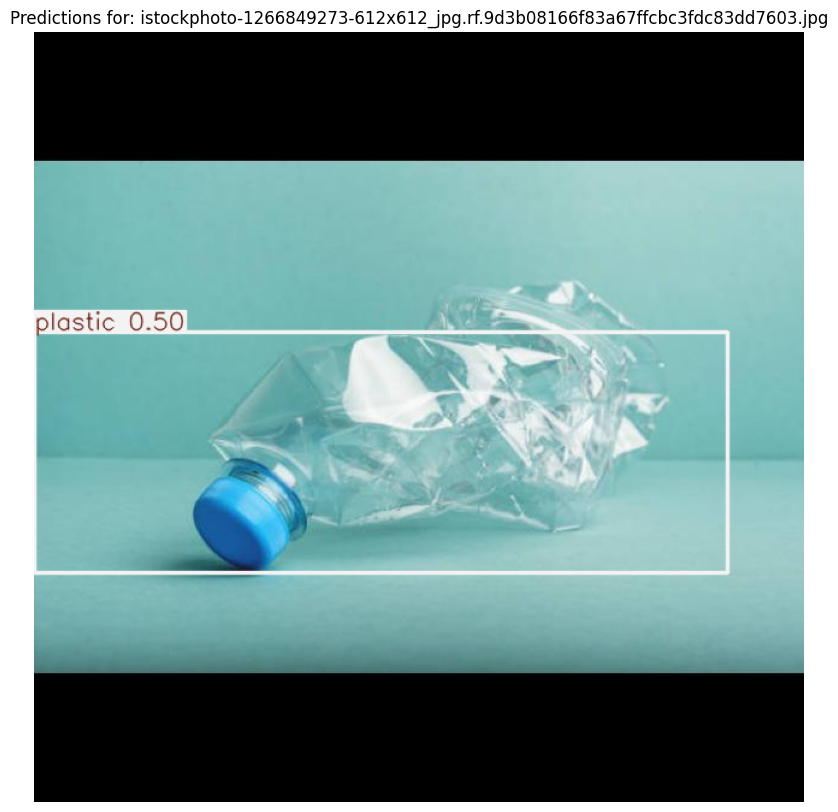


0: 640x640 3 Metals, 1 paper, 11.4ms
Speed: 2.7ms preprocess, 11.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


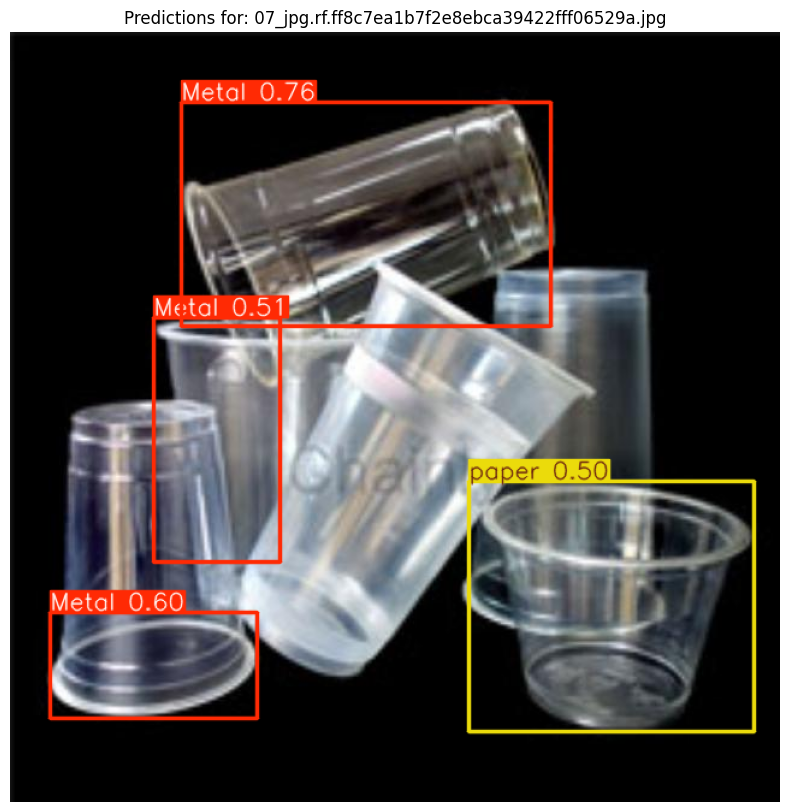


0: 640x640 1 paper, 9.1ms
Speed: 2.7ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


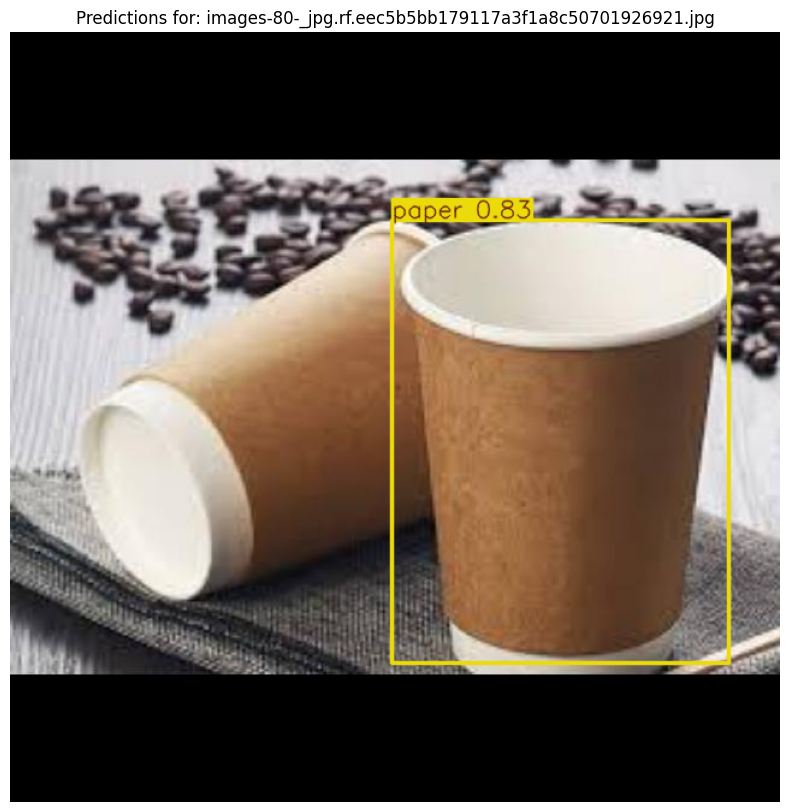


0: 640x640 2 papers, 9.4ms
Speed: 3.0ms preprocess, 9.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


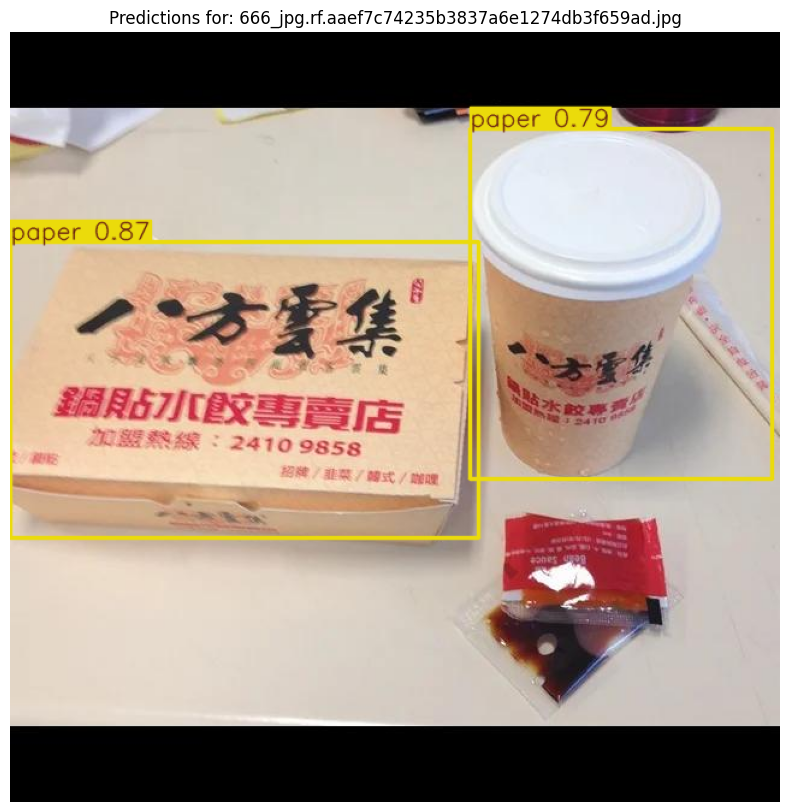

In [ ]:
# Visualize predictions
print("\nVisualizing predictions on sample images...")
visualize_predictions(model, dataset_path, conf_threshold=0.5)

***

**Image_Segmentation**

In [ ]:

def train_segmentation_model(dataset_path, epochs, train_name="experiment_seg"):
    """
    Train YOLOv8 segmentation model on plant disease dataset
    """
    # Initialize segmentation model
    model = YOLO('yolov8x-seg.pt')

    # Train the model
    results = model.train(
        data=str(dataset_path / "data.yaml"),
        epochs=epochs,
        name=train_name,
        imgsz=640,
        batch=4
        #device=0
    )

    return model, results

In [ ]:
def evaluate_segmentation_model(model, dataset_path):
    """
    Evaluate trained segmentation model
    """
    # Validate the model
    metrics = model.val(data=str(dataset_path / "data.yaml"))

    print("\nSegmentation Evaluation Metrics:")
    print(f"mAP50: {metrics.box.map50:.4f}")
    print(f"mAP50-95: {metrics.box.map:.4f}")
    # Additional segmentation metrics
    print(f"Segmentation mAP50: {metrics.seg.map50:.4f}")
    print(f"Segmentation mAP50-95: {metrics.seg.map:.4f}")

In [ ]:
def visualize_segmentation(model, dataset_path, num_images=2, conf_threshold=0.5):
    """
    Visualize segmentation predictions
    """
    images_dir = dataset_path / "test" / "images"
    image_paths = list(images_dir.glob("*.jpg"))[:num_images]

    for image_path in image_paths:
        # Read image
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform inference with segmentation
        results = model.predict(image, conf=conf_threshold)

        # Visualize results
        annotated_frame = results[0].plot()
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_frame)
        plt.axis("off")
        plt.title(f"Segmentation Predictions: {image_path.name}")
        plt.show()

In [ ]:
EPOCHS = 10
dataset_path = Path("./plant_disease_dataset")

In [ ]:
print("\nDataset structure verification:")
for split in ['train', 'valid', 'test']:
    images_path = dataset_path / split / 'images'
    labels_path = dataset_path / split / 'labels'
    print(f"\n{split} set:")
    print(f"Images path: {images_path}")
    print(f"Number of images: {len(list(images_path.glob('*.jpg')))}")
    print(f"Labels path: {labels_path}")
    print(f"Number of labels: {len(list(labels_path.glob('*.txt')))}")


Dataset structure verification:

train set:
Images path: plant_disease_dataset/train/images
Number of images: 1746
Labels path: plant_disease_dataset/train/labels
Number of labels: 1746

valid set:
Images path: plant_disease_dataset/valid/images
Number of images: 135
Labels path: plant_disease_dataset/valid/labels
Number of labels: 135

test set:
Images path: plant_disease_dataset/test/images
Number of images: 130
Labels path: plant_disease_dataset/test/labels
Number of labels: 130


In [ ]:
print("\nStarting segmentation model training...")
model, results = train_segmentation_model(dataset_path, epochs=EPOCHS)


Starting segmentation model training...


100%|██████████| 137M/137M [00:01<00:00, 104MB/s]


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=plant_disease_dataset/data.yaml, epochs=15, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=experiment_seg, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 29.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 88.9MB/s]


AMP: checks passed ✅


train: Scanning /content/plant_disease_dataset/train/labels... 1746 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1746/1746 [00:01<00:00, 1012.27it/s]

train: WARNING ⚠️ /content/plant_disease_dataset/train/images/1_jpg.rf.f396999df8050a74f10b7956c1bfb8e3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/plant_disease_dataset/train/images/1_jpg.rf.f8b6f661ac5351af016b6486fa917b1f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/plant_disease_dataset/train/images/219e4fad-7508-4da3-95cb-5e7984cb56df_jpg.rf.4a768b0d64d01e6160ae758bb8172906.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/plant_disease_dataset/train/images/219e4fad-7508-4da3-95cb-5e7984cb56df_jpg.rf.6415b0166466319acbe2006e1899d803.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/plant_disease_dataset/train/images/22_jpg.rf.17b86bb0e682a59a3719f1082a586eb5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/plant_disease_dataset/train/images/22_jpg.rf.7b4ef962be783f560c36a12077a9b508.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/plant_disease_dataset/train/images/2_jpg.rf.68869160e69392f18023b7dbf941ba91.jpg: 1 d

train: New cache created: /content/plant_disease_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/plant_disease_dataset/valid/labels... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 541.00it/s]

val: WARNING ⚠️ /content/plant_disease_dataset/valid/images/sb-lc-diseases-header-leaf-spot_jpg.rf.01eda540d4566bd532051e7787622200.jpg: 1 duplicate labels removed
val: New cache created: /content/plant_disease_dataset/valid/labels.cache


Plotting labels to runs/segment/experiment_seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/experiment_seg
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/15      6.42G      2.358      3.949      2.322       1.79        163        640: 100%|██████████| 437/437 [03:46<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]

                   all        135       2180      0.597      0.451      0.486      0.253      0.611      0.439      0.486      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/15      5.99G       2.41      3.959      2.282      1.799         20        640: 100%|██████████| 437/437 [03:38<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.63it/s]

                   all        135       2180       0.66      0.515      0.559      0.269      0.646       0.53      0.565      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/15      5.98G      2.354      3.934      2.281      1.787         47        640: 100%|██████████| 437/437 [03:36<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]

                   all        135       2180      0.604      0.495      0.521      0.311      0.612      0.498      0.528      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/15      6.23G      2.306      3.854      2.198      1.732         48        640: 100%|██████████| 437/437 [03:38<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.68it/s]

                   all        135       2180      0.639      0.504      0.551      0.304      0.655      0.509      0.564      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/15      5.91G      2.267      3.773      2.117      1.727         30        640: 100%|██████████| 437/437 [03:36<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.82it/s]

                   all        135       2180      0.632      0.513      0.548       0.32       0.65      0.504      0.555      0.298


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/15       5.9G      2.273      3.789      2.201      1.771          7        640: 100%|██████████| 437/437 [03:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.60it/s]

                   all        135       2180      0.695      0.543      0.619      0.375      0.693      0.537      0.617      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/15      6.11G      2.225      3.725      2.112      1.749         24        640: 100%|██████████| 437/437 [03:26<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]

                   all        135       2180      0.651       0.55       0.59      0.349      0.647      0.557      0.597      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/15      6.08G      2.188      3.677       2.08      1.725         63        640: 100%|██████████| 437/437 [03:18<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.77it/s]

                   all        135       2180      0.681      0.563      0.614      0.373       0.69      0.566      0.627      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/15      6.05G      2.177      3.634      1.999      1.699         20        640: 100%|██████████| 437/437 [03:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.76it/s]

                   all        135       2180      0.684      0.565      0.616      0.373      0.685       0.57      0.627      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/15      6.27G      2.152      3.634      1.997      1.698         29        640: 100%|██████████| 437/437 [03:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.80it/s]

                   all        135       2180       0.68      0.575      0.617      0.367      0.702      0.583      0.638      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/15      6.06G      2.126      3.556      1.961      1.681         22        640: 100%|██████████| 437/437 [03:20<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.78it/s]

                   all        135       2180      0.693      0.589      0.642      0.401      0.705      0.589      0.644      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/15      5.73G      2.089      3.506      1.917      1.647         51        640: 100%|██████████| 437/437 [03:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.66it/s]

                   all        135       2180      0.723      0.569       0.63      0.365       0.73      0.581       0.65      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/15      5.87G      2.066      3.478      1.897      1.623         42        640: 100%|██████████| 437/437 [03:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.68it/s]

                   all        135       2180      0.687      0.547      0.604      0.383      0.698      0.552      0.614      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/15      5.88G       2.05      3.449      1.859       1.63         62        640: 100%|██████████| 437/437 [03:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.83it/s]

                   all        135       2180      0.679      0.578      0.626      0.393      0.692      0.579      0.636      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/15      5.96G      2.018      3.418      1.822      1.613         55        640: 100%|██████████| 437/437 [03:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.70it/s]

                   all        135       2180      0.681      0.588      0.635      0.404      0.693      0.596      0.645      0.372



15 epochs completed in 0.978 hours.
Optimizer stripped from runs/segment/experiment_seg/weights/last.pt, 143.9MB
Optimizer stripped from runs/segment/experiment_seg/weights/best.pt, 143.9MB

Validating runs/segment/experiment_seg/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,721,619 parameters, 0 gradients, 343.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.28it/s]


                   all        135       2180      0.681      0.588      0.635      0.404      0.694      0.596      0.645      0.372
Speed: 0.4ms preprocess, 33.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/experiment_seg


In [ ]:
print("\nEvaluating segmentation model...")
evaluate_segmentation_model(model, dataset_path)


Evaluating segmentation model...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71,721,619 parameters, 0 gradients, 343.7 GFLOPs


val: Scanning /content/plant_disease_dataset/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/plant_disease_dataset/valid/images/sb-lc-diseases-header-leaf-spot_jpg.rf.01eda540d4566bd532051e7787622200.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]


                   all        135       2180      0.682      0.587      0.635      0.405      0.692      0.595      0.645      0.367
Speed: 0.6ms preprocess, 94.4ms inference, 0.1ms loss, 2.1ms postprocess per image
Results saved to runs/segment/experiment_seg2

Segmentation Evaluation Metrics:
mAP50: 0.6349
mAP50-95: 0.4046
Segmentation mAP50: 0.6451
Segmentation mAP50-95: 0.3671



Visualizing segmentation predictions...

0: 640x640 (no detections), 112.5ms
Speed: 2.8ms preprocess, 112.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


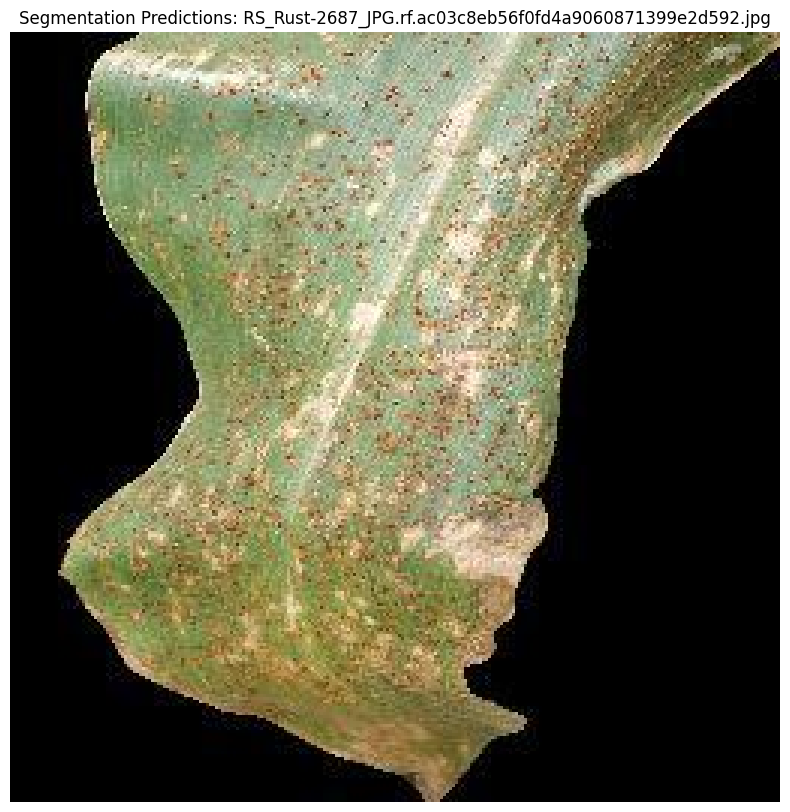


0: 640x640 1 Disease, 70.6ms
Speed: 4.8ms preprocess, 70.6ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 640)


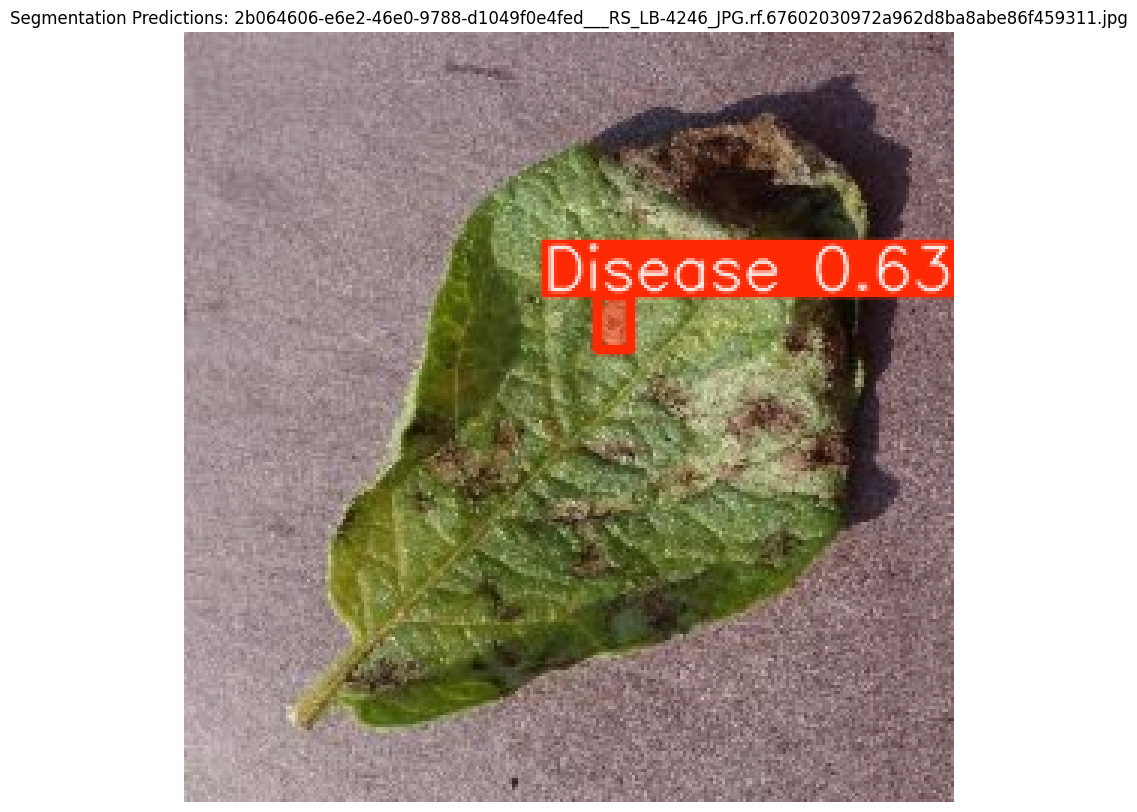


0: 640x640 (no detections), 70.8ms
Speed: 4.3ms preprocess, 70.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


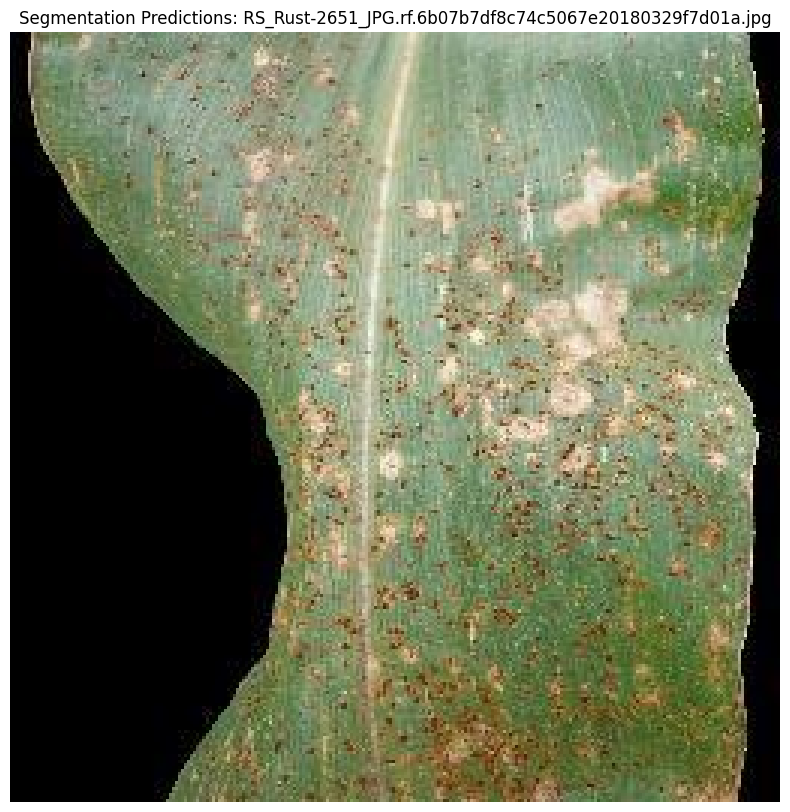


0: 640x640 (no detections), 71.2ms
Speed: 4.1ms preprocess, 71.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


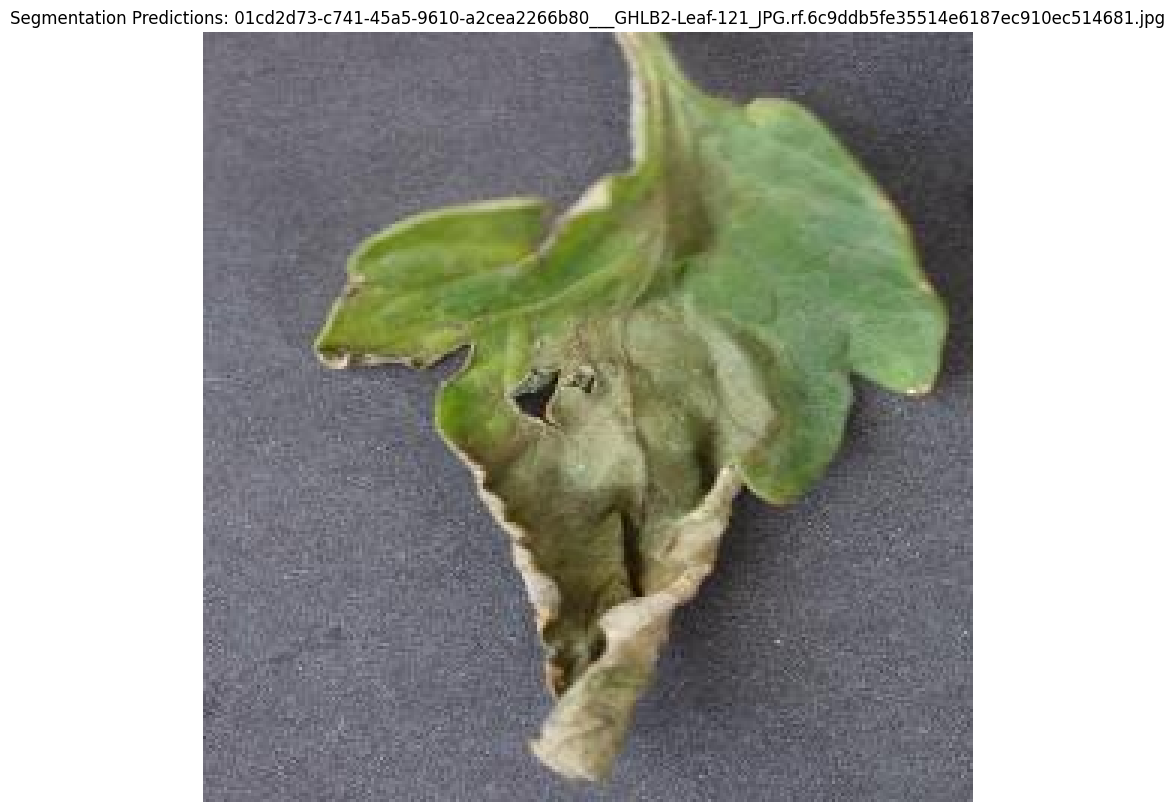


0: 640x640 (no detections), 70.9ms
Speed: 4.4ms preprocess, 70.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


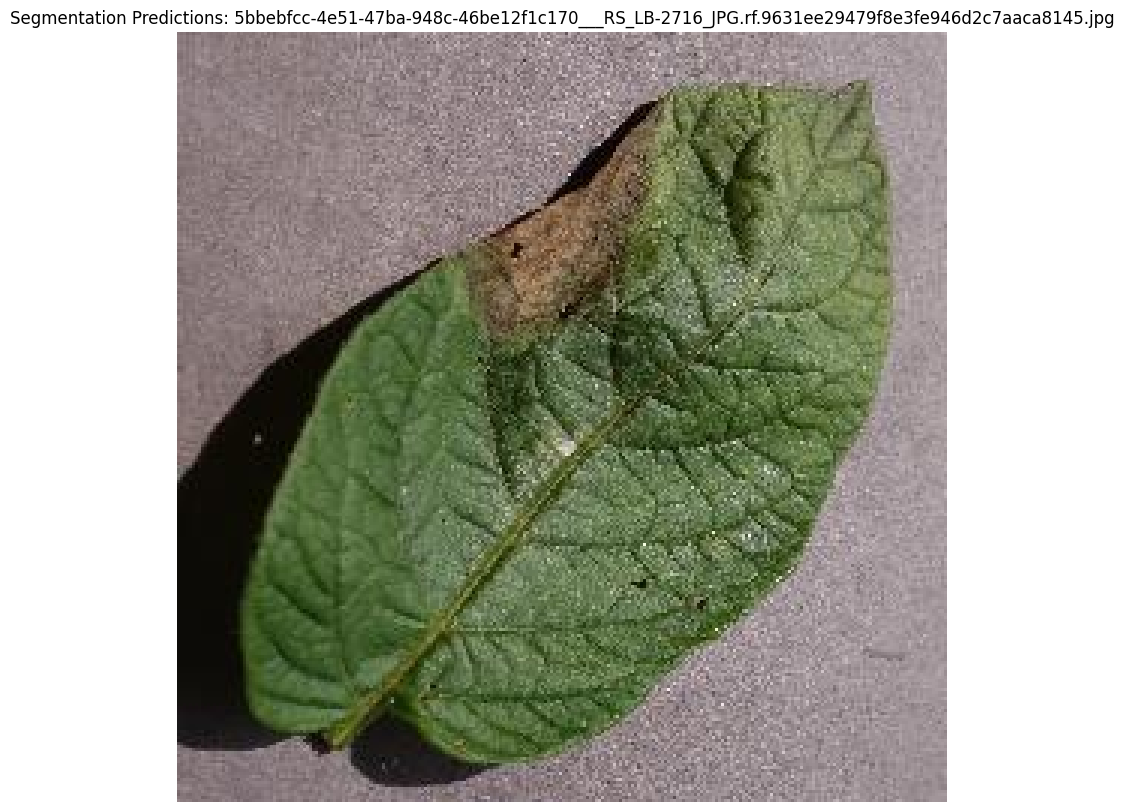

In [ ]:
print("\nVisualizing segmentation predictions...")
visualize_segmentation(model, dataset_path)